In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import qutip
from CoupledQuantumSystems.systems import FluxoniumOscillatorSystem
from CoupledQuantumSystems.drive import DriveTerm,square_pulse_with_rise_fall
from CoupledQuantumSystems.evo_parrallel import run_parallel_ODEsolve_and_post_process_jobs_with_different_systems

In [2]:
max_ql = 20
max_ol = 80
EJ = 4
EC = EJ/2.7
EL = EJ/45
Er = 10.38695526

g = 0.2
w_d = 10.389507326769158
amp = 0.005

tot_time =1000
tlist = np.linspace(0, tot_time, tot_time)
system  =  FluxoniumOscillatorSystem(
                EJ = EJ,
                EC = EC,
                EL = EL,
                Er = Er,
                g_strength = g,
                qubit_level = max_ql,
                osc_level = max_ol,
                products_to_keep=[[ql, ol] for ql in range(15) for ol in range(max_ol) ],
                computaional_states = '0,2',
                )


systems = [system,system,system]

initial_states  = [
    qutip.basis(max_ql * max_ol, system.product_to_dressed[(ql,0)]) for ql in [0,1,2]
    ]


list_of_systems = []
list_of_kwargs = []
for system, y0 in zip(systems, initial_states):
    list_of_systems.append(system)
    list_of_kwargs.append( {
        'y0':system.truncate_function(y0) ,
        'tlist':tlist,
        'drive_terms':[DriveTerm( 
                            driven_op= system.driven_operator,
                            pulse_shape_func=square_pulse_with_rise_fall,
                            pulse_shape_args={
                                'w_d': w_d ,
                                'amp': amp,
                                't_rise': 20,
                                't_square': tot_time
                            })],
        'e_ops':[system.a_trunc , system.a_trunc.dag()*system.a_trunc],
        # 'c_ops':[kappa *qutip.lindblad_dissipator(system.a_trunc) ]
        })
    

# results = run_parallel_ODEsolve_and_post_process_jobs_with_different_systems(
#     list_of_systems,
#     list_of_kwargs,
#     post_processing = ['pad_back']
# )


# import pickle
# with open('sesolve_large_dim_a005.pkl', 'wb') as file:
#     pickle.dump(results, file)


In [3]:
with open('sesolve_large_dim_a005.pkl', 'rb') as file:
    results = pickle.load(file)

(0.0, 470.0)

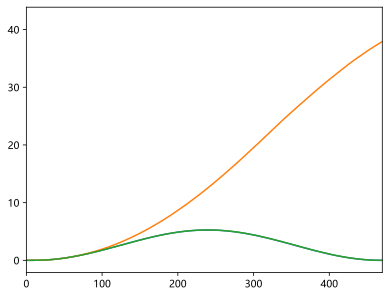

In [4]:
for i in [0,1,2]:
    plt.plot(results[i].expect[1])
plt.xlim(0,470)

(0.0, 0.01)

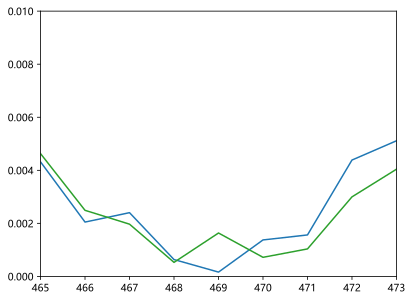

In [5]:
for i in [0,1,2]:
    plt.plot(results[i].expect[1])
plt.xlim(465,473)
plt.ylim(0,0.01)

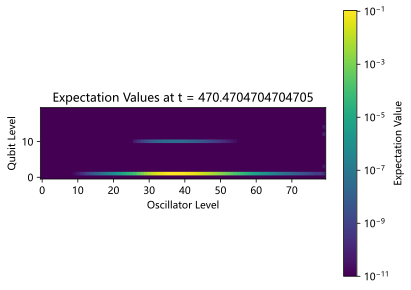

In [6]:
from CoupledQuantumSystems.visualization import *
plot_heatmap(results[1],470,system.product_to_dressed,max_ql,max_ol,LogNorm())

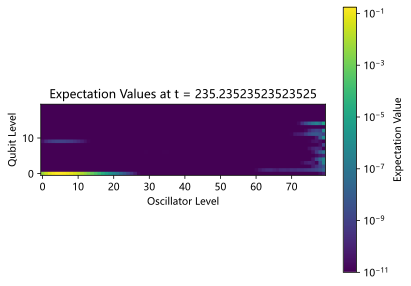

In [10]:
plot_heatmap(results[0],235,system.product_to_dressed,max_ql,max_ol,LogNorm())

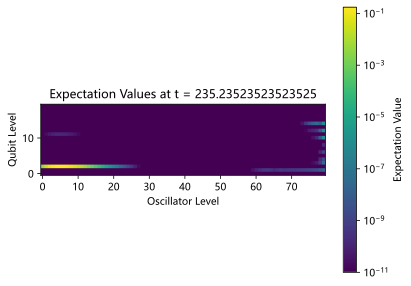

In [11]:
plot_heatmap(results[2],235,system.product_to_dressed,max_ql,max_ol,LogNorm())

In [ ]:
max_ql = 30
max_ol = 500
EJ = 4
EC = EJ/2.7
EL = EJ/45
Er = 10.38695526


g = 0.2
system  =  FluxoniumOscillatorSystem(
                EJ = EJ,
                EC = EC,
                EL = EL,
                Er = Er,
                g_strength = g,
                qubit_level = max_ql,
                osc_level = max_ol,
                products_to_keep=[[ql, ol] for ql in range(max_ql) for ol in range(max_ol) ],
                computaional_states = '0,2',
                ) 


In [4]:

import pickle
with open('gf_ql30ol500_system.pkl', 'wb') as f:
    pickle.dump(system,f)

In [6]:
id_wrapped_resonator_destory = qutip.tensor(qutip.identity(max_ql), qutip.destroy(max_ol))
id_wrapped_fluxonium_destory = qutip.tensor(qutip.destroy(max_ql), qutip.identity(max_ol))
resonator_creation_arr = id_wrapped_resonator_destory.dag().full()
resonator_destory_arr= id_wrapped_resonator_destory.full()
fluxonium_creation_arr = id_wrapped_fluxonium_destory.dag().full()
fluxonium_destory_arr= id_wrapped_fluxonium_destory.full()


ladder_overlap = system.get_ladder_overlap_arr(resonator_creation_arr)

import pickle
with open('gf_ql30ol500_ladder_overlap.pkl', 'wb') as f:
    pickle.dump(ladder_overlap,f)

issue with going from (3, 26) to (3, 27)
issue with going from (3, 273) to (3, 274)
issue with going from (3, 498) to (3, 499)
issue with going from (14, 272) to (14, 273)
issue with going from (14, 497) to (14, 498)
issue with going from (14, 498) to (14, 499)
issue with going from (15, 224) to (15, 225)
issue with going from (15, 497) to (15, 498)
issue with going from (23, 24) to (23, 25)
issue with going from (23, 496) to (23, 497)
issue with going from (23, 498) to (23, 499)
issue with going from (24, 223) to (24, 224)
issue with going from (24, 496) to (24, 497)
issue with going from (25, 498) to (25, 499)


 /tmp/ipykernel_55578/266561690.py: 28ComplexWarning: Casting complex values to real discards the imaginary part
 /tmp/ipykernel_55578/266561690.py: 30ComplexWarning: Casting complex values to real discards the imaginary part
 /tmp/ipykernel_55578/266561690.py: 41ComplexWarning: Casting complex values to real discards the imaginary part
 /tmp/ipykernel_55578/266561690.py: 43

Text(0.5, 1.0, 'based on overlap with $a^\\dagger |q,n-1\\rangle$')

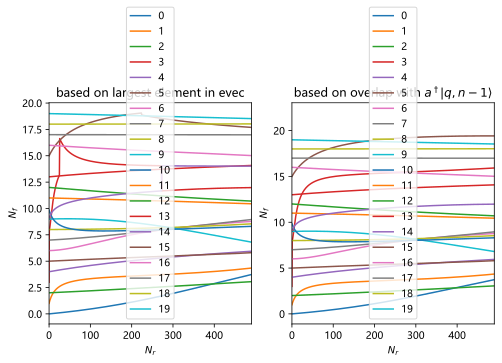

: 

In [7]:
def find_next_in_branch(dressed_idx_of_qubit_i_resonator_n:int):
    return np.argmax(ladder_overlap[:,dressed_idx_of_qubit_i_resonator_n])

diagonalization_idx_arr = np.zeros((max_ql,max_ol),dtype=int)
diagonalization_idx_arr_with_marks = np.zeros((max_ql,max_ol),dtype=int)
overlap_idx_arr = np.zeros((max_ql,max_ol),dtype=int)
for ql in range(max_ql):
    for ol in range(max_ol):
        diagonalization_idx_arr[ql,ol] = system.product_to_dressed[(ql,ol)]
        diagonalization_idx_arr_with_marks[ql,ol] = system.product_to_dressed[(ql,ol)]
        if ol>=1 and system.product_to_dressed[(ql,ol)] != find_next_in_branch(system.product_to_dressed[(ql,ol-1)]):
            print(f"issue with going from {(ql,ol-1)} to {(ql,ol)}")
            diagonalization_idx_arr_with_marks[ql,ol] = -1000

        if ol < 1:
            overlap_idx_arr[ql,ol] = system.product_to_dressed[(ql,ol)]
        else:
            overlap_idx_arr[ql,ol] = np.argmax(ladder_overlap[:,overlap_idx_arr[ql,ol-1]])

fig,axes = plt.subplots(1,2,figsize=(8,4))
qls = list(range(20))
for ql in qls:
    dressed_idx_arr = diagonalization_idx_arr[ql]
    photon_num_arr = np.zeros((max_ol))
    fluxonium_num_arr = np.zeros((max_ol))
    for ol in range(max_ol):
        state_after_a = resonator_destory_arr @ system.evecs[dressed_idx_arr[ol]].full()
        photon_num_arr[ol] = np.sum(state_after_a**2)
        state_after_fluxnonium_a = fluxonium_destory_arr @ system.evecs[dressed_idx_arr[ol]].full()
        fluxonium_num_arr[ol] = np.sum(state_after_fluxnonium_a**2)

    axes[0].plot(photon_num_arr,fluxonium_num_arr,label=f'{ql}')
axes[0].legend()

for ql in qls:
    dressed_idx_arr = overlap_idx_arr[ql]
    photon_num_arr = np.zeros((max_ol))
    fluxonium_num_arr = np.zeros((max_ol))
    for ol in range(max_ol):
        state_after_a = resonator_destory_arr @ system.evecs[dressed_idx_arr[ol]].full()
        photon_num_arr[ol] = np.sum(state_after_a**2)
        state_after_fluxnonium_a = fluxonium_destory_arr @ system.evecs[dressed_idx_arr[ol]].full()
        fluxonium_num_arr[ol] = np.sum(state_after_fluxnonium_a**2)

    axes[1].plot(photon_num_arr,fluxonium_num_arr,label=f'{ql}')
axes[1].legend()

axes[0].set_xlim(0,max_ol-10)
axes[1].set_xlim(0,max_ol-10)
axes[0].set_xlabel(r'$N_r$')
axes[0].set_ylabel(r'$N_f$')
axes[1].set_xlabel(r'$N_r$')
axes[1].set_ylabel(r'$N_f$')

axes[0].set_title("based on largest element in evec")
axes[1].set_title(r"based on overlap with $a^\dagger |q,n-1\rangle$")

In [29]:
t_slice_len = 5
expectation_list = []
for ql in range(3): 
    states_in_product_basis = system.convert_dressed_to_product_vectorized(results[ql].states[::t_slice_len],
                                                                            system.products_to_keep,
                                                                            )
    num_t = len(states_in_product_basis)
    product_array = np.array(states_in_product_basis).reshape(num_t,max_ql,max_ol,max_ql,max_ol)
    # Partial trace
    rho_qbt = np.trace(product_array, axis1=2, axis2=4)
    # Create a stack of projection operators
    P_stack = np.zeros((max_ql, max_ql, max_ql))
    for i in range(max_ql):
        P_stack[i, i, i] = 1 
    expectations = np.einsum('tij,kij->kt', rho_qbt, P_stack)
    expectation_list.append(expectations)

 /home/kai/miniconda3/envs/test/lib/python3.10/site-packages/matplotlib/cbook.py: 1699ComplexWarning: Casting complex values to real discards the imaginary part
 /home/kai/miniconda3/envs/test/lib/python3.10/site-packages/matplotlib/cbook.py: 1345

Text(0.5, 0, 't (ns)')

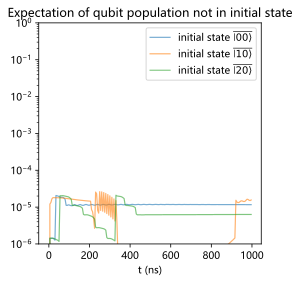

In [30]:
plt.figure(figsize=(4,4))
for ql in range(3): 
    plt.plot(tlist[::t_slice_len],1-expectation_list[ql][ql],label = rf"initial state $\overline{{\left|{ql}0\right>}}$",linewidth =1.2,alpha = 0.6)
plt.yscale('log')
plt.ylim(1e-6,1)
plt.legend()
# plt.title('expecation of qubit not being in initial state,\n sesolve with 15 level qbt, 40 level osc')
plt.title('Expectation of qubit population not in initial state')
plt.xlabel('t (ns)')

 /home/kai/miniconda3/envs/test/lib/python3.10/site-packages/matplotlib/cbook.py: 1699ComplexWarning: Casting complex values to real discards the imaginary part
 /home/kai/miniconda3/envs/test/lib/python3.10/site-packages/matplotlib/cbook.py: 1345

Text(0.5, 0, 't (ns)')

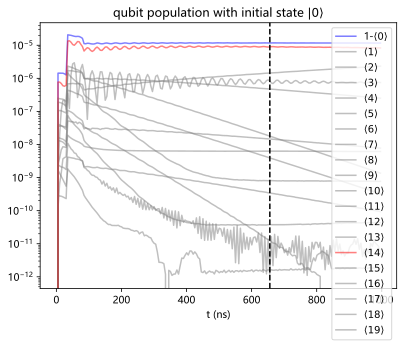

In [37]:
# plt.figure(figsize=(4,4))
initial_ql = 0
for ql in range(max_ql): 
    if ql == initial_ql:
        plt.plot(tlist[::t_slice_len],1-expectation_list[initial_ql][ql],label = rf"1-$\langle{ql}\rangle$",color='blue',alpha=0.5)
    elif ql != 14:
        plt.plot(tlist[::t_slice_len],expectation_list[initial_ql][ql],label = rf"$\langle{ql}\rangle$",color='grey',alpha=0.5)
    else:
        plt.plot(tlist[::t_slice_len],expectation_list[initial_ql][ql],label = rf"$\langle{ql}\rangle$",color='red',alpha=0.5)


plt.axvline(x=656, color='k', linestyle='--')

plt.title(rf'qubit population with initial state $|{initial_ql}\rangle$')
plt.yscale('log')
plt.legend()
plt.legend()
plt.xlabel('t (ns)')

 /home/kai/miniconda3/envs/test/lib/python3.10/site-packages/matplotlib/cbook.py: 1699ComplexWarning: Casting complex values to real discards the imaginary part
 /home/kai/miniconda3/envs/test/lib/python3.10/site-packages/matplotlib/cbook.py: 1345

Text(0.5, 0, 't (ns)')

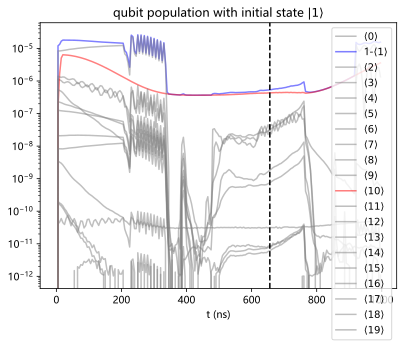

In [36]:
# plt.figure(figsize=(4,4))
initial_ql = 1
for ql in range(max_ql): 
    if ql == initial_ql:
        plt.plot(tlist[::t_slice_len],1-expectation_list[initial_ql][ql],label = rf"1-$\langle{ql}\rangle$",color='blue',alpha=0.5)
    elif ql != 10:
        plt.plot(tlist[::t_slice_len],expectation_list[initial_ql][ql],label = rf"$\langle{ql}\rangle$",color='grey',alpha=0.5)
    else:
        plt.plot(tlist[::t_slice_len],expectation_list[initial_ql][ql],label = rf"$\langle{ql}\rangle$",color='red',alpha=0.5)


plt.axvline(x=656, color='k', linestyle='--')

plt.title(rf'qubit population with initial state $|{initial_ql}\rangle$')
plt.yscale('log')
plt.legend()
plt.legend()
plt.xlabel('t (ns)')

 /home/kai/miniconda3/envs/test/lib/python3.10/site-packages/matplotlib/cbook.py: 1699ComplexWarning: Casting complex values to real discards the imaginary part
 /home/kai/miniconda3/envs/test/lib/python3.10/site-packages/matplotlib/cbook.py: 1345

Text(0.5, 0, 't (ns)')

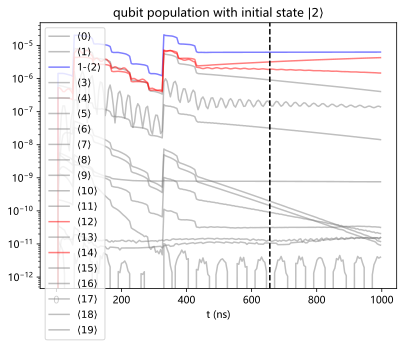

In [38]:
# plt.figure(figsize=(4,4))
initial_ql = 2
for ql in range(max_ql): 
    if ql == initial_ql:
        plt.plot(tlist[::t_slice_len],1-expectation_list[initial_ql][ql],label = rf"1-$\langle{ql}\rangle$",color='blue',alpha=0.5)
    elif ql not in [12,14]:
        plt.plot(tlist[::t_slice_len],expectation_list[initial_ql][ql],label = rf"$\langle{ql}\rangle$",color='grey',alpha=0.5)
    else:
        plt.plot(tlist[::t_slice_len],expectation_list[initial_ql][ql],label = rf"$\langle{ql}\rangle$",color='red',alpha=0.5)


plt.axvline(x=656, color='k', linestyle='--')

plt.title(rf'qubit population with initial state $|{initial_ql}\rangle$')
plt.yscale('log')
plt.legend()
plt.legend()
plt.xlabel('t (ns)')